In [13]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [14]:
def parser(x):
 return datetime.strptime('200'+x, '%Y-%m')

# series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
df = pd.read_csv('shampoo.csv', index_col=0, parse_dates=[0], date_parser=parser)

df.head()

/var/folders/hg/69dt6nq563b9pt0myh8sprb40000gn/T/ipykernel_17498/2643970397.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('shampoo.csv', index_col=0, parse_dates=[0], date_parser=parser)


,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


<Axes: xlabel='Month'>

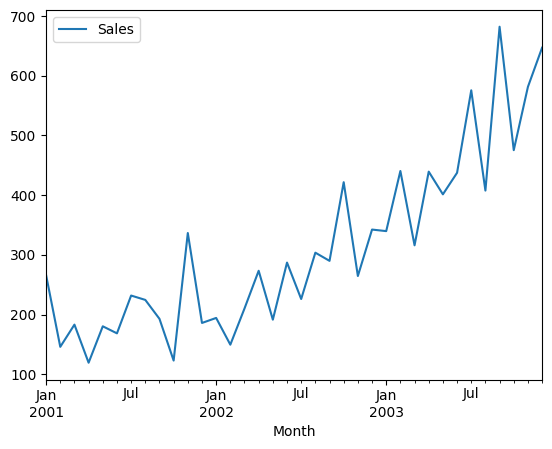

In [15]:
df.plot()

In [16]:
train = df[:round(len(df)*0.66)]
test = df[round(len(df)*0.66):]
history = [x for x in train['Sales']]
predictions = list()

# history
# test.iloc[0]

In [17]:
from statsmodels.tsa.arima.model import ARIMA

for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Sales'][t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/var/folders/hg/69dt6nq563b9pt0myh8sprb40000gn/T/ipykernel_17498/3763979372.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test['Sales'][t]


predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000


In [18]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 92.656


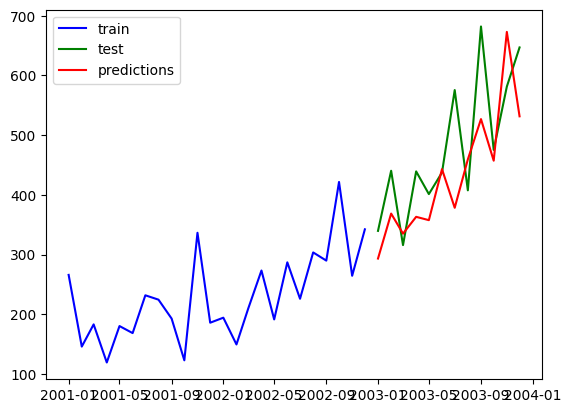

In [19]:
plt.plot(train, color='blue')
plt.plot(test, color='green')
plt.plot(test.index, predictions, color='red')

plt.legend(['train', 'test', 'predictions'], loc='upper left')

In [20]:
# df.tail()

futureDate = pd.DataFrame(pd.date_range(start='2004-01-01', end='2004-12-01', freq='MS'), columns=['Month'])
futureDate.set_index('Month', inplace=True)

futureDate.head()

""
Month
2004-01-01
2004-02-01
2004-03-01
2004-04-01
2004-05-01


In [22]:
futurePred = model_fit.predict(start=len(df), end=len(df)+11, typ='levels')
futurePred = pd.DataFrame(futurePred, columns=['Sales'], index=futureDate.index)
futurePred

# df.index[1]

,Sales
Month,
2004-01-01,565.565273
2004-02-01,582.216231
2004-03-01,521.458371
2004-04-01,592.324673
2004-05-01,534.531706
2004-06-01,585.643105
2004-07-01,543.198607
2004-08-01,567.942520
2004-09-01,563.041375


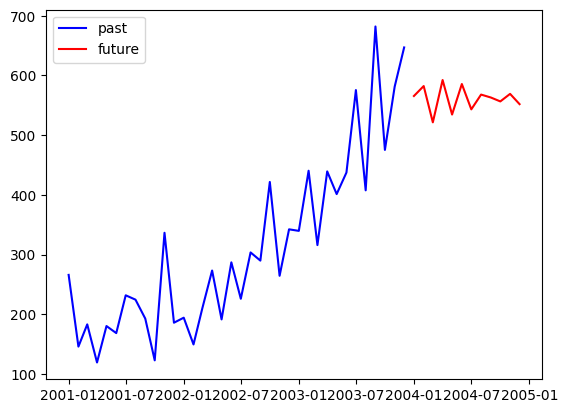

In [117]:
plt.plot(df, color='blue')
plt.plot(futurePred, color='red')

plt.legend(['past', 'future'], loc='upper left')

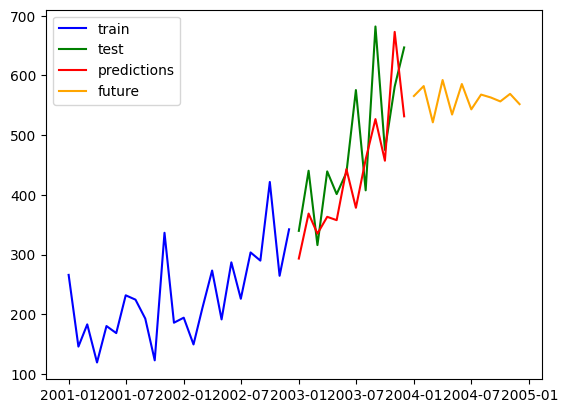

In [118]:
plt.plot(train, color='blue')
plt.plot(test, color='green')
plt.plot(test.index, predictions, color='red')
plt.plot(futurePred, color='orange')

plt.legend(['train', 'test', 'predictions', 'future'], loc='upper left')